# Fraud Analyst Test

## Heberto Jimenez | Machine Learning Engineer

First stage, import the neccessary libraries for a machine learning study.

In [168]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

File stored in local drive, you can replace the file location here, if needed.

In [95]:
df = pd.read_csv(r'C:\Users\hebji\Documents\Examen Empleo\transacciones.csv')

Original file information.

In [96]:
df.head()

,Country,Order Id,Creation date,Fecha,mes,Merchant Id,Account Id,Reference,Description,Transaction type,...,Days to deposit,BIN Bank,Country BIN ISO,Visible number,Card type,Transaction currency,Valor,Processing currency,Processing value,Franchise
0,CO,521715135,2020-08-31 12:41:45.866,8/31/20,8,234543,833883,XYZ-8811992-1598893415162,XYZ agradece su compra.,AUTHORIZATION_AND_CAPTURE,...,NaN,BANCOLOMBIA,CO,549659******9663,CREDIT,COP,34450,COP,34450.0,MASTERCARD
1,CO,521714842,2020-08-31 12:41:23.219,8/31/20,8,234543,833883,XYZ-8812187-1598894631757,XYZ agradece su compra.,AUTHORIZATION_AND_CAPTURE,...,NaN,BANCOLOMBIA,CO,540696******7669,CREDIT,COP,45850,COP,45850.0,MASTERCARD
2,CO,521714218,2020-08-31 12:41:00.15,8/31/20,8,234543,833883,XYZ-8812199-1598894873278,XYZ agradece su compra.,AUTHORIZATION_AND_CAPTURE,...,NaN,BBVA COLOMBIA,CO,553643******9379,CREDIT,COP,50876,COP,50876.0,MASTERCARD
3,CO,521713519,2020-08-31 12:40:19.128,8/31/20,8,234543,839429,XYZ-464504-1598895616616,XYZ agradece su compra.,REFUND,...,NaN,BANCO DAVIVIEND,CO,499635******9266,DEBIT,COP,500,COP,500.0,VISA
4,CO,521713519,2020-08-31 12:40:16.871,8/31/20,8,234543,839429,XYZ-464504-1598895616616,XYZ agradece su compra.,AUTHORIZATION_AND_CAPTURE,...,NaN,BANCO DAVIVIEND,CO,499635******9266,DEBIT,COP,500,COP,500.0,VISA


It is important to keep only valuable information. Description is the same for all the order, does not provide any information of the order. Visible number corresponds to the card number, however, it does not contain the full number, keeping this variable will not help in the predicting model. Order ID does not provide relevant information for the order. Mes, is just the month, a value already available in creation date and fecha. Reference, same as order id, does not provide relevant information. Payment method contains the card type, so it will not provide more information.

In [97]:
no_needed = ["Description", "Visible number", "Order Id", "mes", "Reference","Card type"]
df = df.drop(columns = no_needed)
df.head()

,Country,Creation date,Fecha,Merchant Id,Account Id,Transaction type,Status,Response code,Bank Response code,Message response error,...,Transaction origin,Accreditation model,Days to deposit,BIN Bank,Country BIN ISO,Transaction currency,Valor,Processing currency,Processing value,Franchise
0,CO,2020-08-31 12:41:45.866,8/31/20,234543,833883,AUTHORIZATION_AND_CAPTURE,APPROVED,APPROVED,0,NaN,...,POST_API,IMMEDIATE,NaN,BANCOLOMBIA,CO,COP,34450,COP,34450.0,MASTERCARD
1,CO,2020-08-31 12:41:23.219,8/31/20,234543,833883,AUTHORIZATION_AND_CAPTURE,DECLINED,INSUFFICIENT_FUNDS,51,Fondos Insuficientes,...,POST_API,IMMEDIATE,NaN,BANCOLOMBIA,CO,COP,45850,COP,45850.0,MASTERCARD
2,CO,2020-08-31 12:41:00.15,8/31/20,234543,833883,AUTHORIZATION_AND_CAPTURE,DECLINED,ANTIFRAUD_REJECTED,NaN,NaN,...,POST_API,IMMEDIATE,NaN,BBVA COLOMBIA,CO,COP,50876,COP,50876.0,MASTERCARD
3,CO,2020-08-31 12:40:19.128,8/31/20,234543,839429,REFUND,APPROVED,APPROVED,0,NaN,...,POST_API,IMMEDIATE,NaN,BANCO DAVIVIEND,CO,COP,500,COP,500.0,VISA
4,CO,2020-08-31 12:40:16.871,8/31/20,234543,839429,AUTHORIZATION_AND_CAPTURE,APPROVED,APPROVED,0,NaN,...,POST_API,IMMEDIATE,NaN,BANCO DAVIVIEND,CO,COP,500,COP,500.0,VISA


Cleaning data set is importnat to avopide overfiting. Now, it is important to remove variables with no more than 1 value.

In [98]:
df.shape

(570312, 23)

A total of 570312 transactions.

### Is important to get more information related to the variables, to understand if they indeed provide helpful information.

Just one type of Transaction currency. It wont provide helpful information.

In [99]:
df.value_counts("Transaction currency")

Transaction currency
COP    570312
dtype: int64

Just one type of Country. It wont provide helpful information.

In [100]:
df.value_counts("Country")

Country
CO    570228
dtype: int64

Country BIN ISO has a total of 107 values, even if it is not equally distributed, it contains important information.

In [101]:
df.value_counts("Country BIN ISO")

Country BIN ISO
CO    376493
US    145337
BO     10356
HK      6324
BR      6254
       ...  
EE         1
BA         1
AW         1
AO         1
ZW         1
Length: 107, dtype: int64

Just one type of Processing currency. It wont provide helpful information.

In [102]:
df.value_counts("Processing currency")

Processing currency
COP    566899
dtype: int64

Valor and Processin value contains the same information, we should keep just one of them.

In [103]:
df["Valor"] == df["Processing value"]

0         True
1         True
2         True
3         True
4         True
          ... 
570307    True
570308    True
570309    True
570310    True
570311    True
Length: 570312, dtype: bool

Payment model could add noise to the data set.

In [104]:
df.value_counts("Payment model")

Payment model
GATEWAY       570278
AGGREGATOR        34
dtype: int64

Transaction origin could lead to particular differences, it will be helpful to see the ralatioshp later.

In [105]:
df.value_counts("Transaction origin")

Transaction origin
POST_API              569464
STANDARD_HTML_v4_0       848
dtype: int64

Just one type of Accreditation model. It wont provide helpful information.

In [106]:
df.value_counts("Accreditation model")

Accreditation model
IMMEDIATE    566005
dtype: int64

Days to deposit contains no info.

In [107]:
df.value_counts("Days to deposit")

Days to deposit
0.0    14
dtype: int64

Just one type of Merchant Id. It wont provide helpful information

In [108]:
df.value_counts("Merchant Id")

Merchant Id
234543    570312
dtype: int64

Int and str values, not ideal for the model.

In [109]:
df.value_counts("Authorization code")

Authorization code
0         51255
ND         6193
2            20
3            19
5            18
          ...  
484807        1
484809        1
484814        1
484819        1
514032        1
Length: 203672, dtype: int64

Bank Response code and Message response error are filled of to many NaN values.

Respondes code contains the information from Status.

In [110]:
no_needed = ["Transaction currency", "Country", "Processing currency","Processing value","Payment model","Accreditation model","Days to deposit","Merchant Id","Authorization code","Status", "Bank Response code", "Message response error"]
df = df.drop(columns = no_needed)
df.head()

,Creation date,Fecha,Account Id,Transaction type,Response code,Payment method,Transaction origin,BIN Bank,Country BIN ISO,Valor,Franchise
0,2020-08-31 12:41:45.866,8/31/20,833883,AUTHORIZATION_AND_CAPTURE,APPROVED,CRED_MASTERCARD,POST_API,BANCOLOMBIA,CO,34450,MASTERCARD
1,2020-08-31 12:41:23.219,8/31/20,833883,AUTHORIZATION_AND_CAPTURE,INSUFFICIENT_FUNDS,REDEBAN_MASTERCARD,POST_API,BANCOLOMBIA,CO,45850,MASTERCARD
2,2020-08-31 12:41:00.15,8/31/20,833883,AUTHORIZATION_AND_CAPTURE,ANTIFRAUD_REJECTED,CRED_MASTERCARD,POST_API,BBVA COLOMBIA,CO,50876,MASTERCARD
3,2020-08-31 12:40:19.128,8/31/20,839429,REFUND,APPROVED,CRED_VISA,POST_API,BANCO DAVIVIEND,CO,500,VISA
4,2020-08-31 12:40:16.871,8/31/20,839429,AUTHORIZATION_AND_CAPTURE,APPROVED,CRED_VISA,POST_API,BANCO DAVIVIEND,CO,500,VISA


The objective is to classify a transacction as fraud, then a classification model should be implemented. Response code has the information of why a transaction was rejected. Since a classification model requires only two outputs, response code needs to be redefined to identify those transactions that were rejected due to fraud, and those accepted or rejected due to any other reason.

In [111]:
df.value_counts("Response code")

Response code
APPROVED                                    293100
ANTIFRAUD_REJECTED                          206761
PAYMENT_NETWORK_REJECTED                     21170
RESTRICTED_CARD                              12924
INVALID_TRANSACTION                           9918
INSUFFICIENT_FUNDS                            8052
INVALID_EXPIRATION_DATE_OR_SECURITY_CODE      6017
ENTITY_DECLINED                               4918
INVALID_CARD                                  3291
EXPIRED_CARD                                  2692
CONTACT_THE_ENTITY                             252
FIX_NOT_REQUIRED                               209
REPEAT_TRANSACTION                             180
ERROR                                          153
ERROR_FIXING_AND_REVERSING                     123
PAYMENT_NETWORK_NO_RESPONSE                     92
INACTIVE_PAYMENT_PROVIDER                       89
PAYMENT_NETWORK_NO_CONNECTION                   79
NOT_ACCEPTED_TRANSACTION                        77
NOT_FIXED_FOR_ERR

New outcome column created, 1 for fradulent transaction, and 0 otherwise.

In [112]:
aux = df["Response code"]
Y = []
for i in aux:
    if i == "ANTIFRAUD_REJECTED":
        Y.append(1)
    else:
        Y.append(0)
df['Y'] = Y
df = df.drop(columns = ["Response code"])
df.head()

,Creation date,Fecha,Account Id,Transaction type,Payment method,Transaction origin,BIN Bank,Country BIN ISO,Valor,Franchise,Y
0,2020-08-31 12:41:45.866,8/31/20,833883,AUTHORIZATION_AND_CAPTURE,CRED_MASTERCARD,POST_API,BANCOLOMBIA,CO,34450,MASTERCARD,0
1,2020-08-31 12:41:23.219,8/31/20,833883,AUTHORIZATION_AND_CAPTURE,REDEBAN_MASTERCARD,POST_API,BANCOLOMBIA,CO,45850,MASTERCARD,0
2,2020-08-31 12:41:00.15,8/31/20,833883,AUTHORIZATION_AND_CAPTURE,CRED_MASTERCARD,POST_API,BBVA COLOMBIA,CO,50876,MASTERCARD,1
3,2020-08-31 12:40:19.128,8/31/20,839429,REFUND,CRED_VISA,POST_API,BANCO DAVIVIEND,CO,500,VISA,0
4,2020-08-31 12:40:16.871,8/31/20,839429,AUTHORIZATION_AND_CAPTURE,CRED_VISA,POST_API,BANCO DAVIVIEND,CO,500,VISA,0


A visaulization of the data could lead to important conclusions

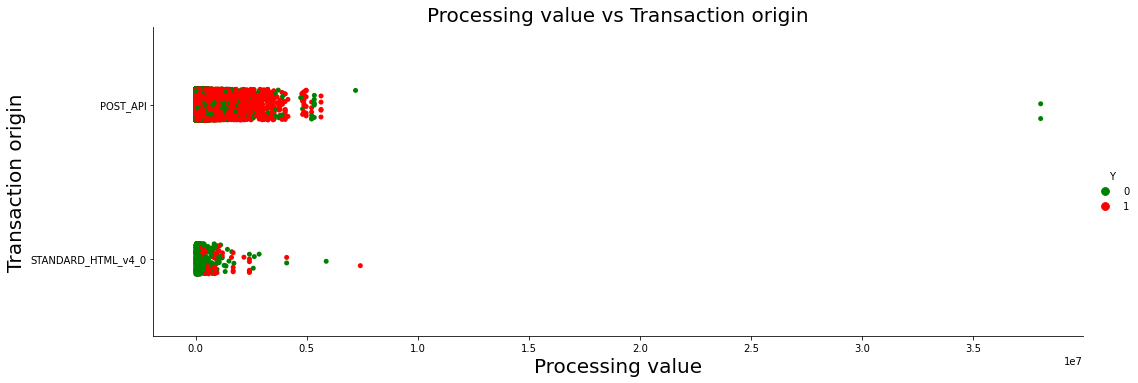

In [113]:
sns.catplot(y="Transaction origin", x="Valor", hue="Y", data=df, aspect = 3,palette=sns.color_palette(['green', 'red']))
plt.xlabel("Processing value",fontsize=20)
plt.ylabel("Transaction origin",fontsize=20)
plt.title("Processing value vs Transaction origin",fontsize=20)
plt.show()

Transaction origin provides important informaiton that relates the outcome taking into account the processing value, therefore, cannot be removed.

In [114]:
df['Hour'] = pd.to_datetime(df['Creation date']).dt.hour
df=df.drop(columns=["Creation date", "Fecha"])
df = df.drop(columns=["Hour"])
df.head()

,Account Id,Transaction type,Payment method,Transaction origin,BIN Bank,Country BIN ISO,Valor,Franchise,Y
0,833883,AUTHORIZATION_AND_CAPTURE,CRED_MASTERCARD,POST_API,BANCOLOMBIA,CO,34450,MASTERCARD,0
1,833883,AUTHORIZATION_AND_CAPTURE,REDEBAN_MASTERCARD,POST_API,BANCOLOMBIA,CO,45850,MASTERCARD,0
2,833883,AUTHORIZATION_AND_CAPTURE,CRED_MASTERCARD,POST_API,BBVA COLOMBIA,CO,50876,MASTERCARD,1
3,839429,REFUND,CRED_VISA,POST_API,BANCO DAVIVIEND,CO,500,VISA,0
4,839429,AUTHORIZATION_AND_CAPTURE,CRED_VISA,POST_API,BANCO DAVIVIEND,CO,500,VISA,0


Data final preparation

In [115]:
df.shape

(570312, 9)

It is important to remove any transaction with missing information.

In [116]:
df = df.dropna(subset=['BIN Bank'])
df = df.dropna(subset=['Country BIN ISO'])
df.shape

(559830, 9)

Variables Country BIN ISO and BIN Bank have to many values, a one hot encoding cannot be applied. Also, these variables are not distributed, so, a frequency based encoding is applied to these.

In [117]:
df_frequency_map = df["Country BIN ISO"].value_counts().to_dict()
df["Country BIN ISO"] = df["Country BIN ISO"].map(df_frequency_map)
df_frequency_map = df["BIN Bank"].value_counts().to_dict()
df["BIN Bank"] = df["BIN Bank"].map(df_frequency_map)
df.head()

,Account Id,Transaction type,Payment method,Transaction origin,BIN Bank,Country BIN ISO,Valor,Franchise,Y
0,833883,AUTHORIZATION_AND_CAPTURE,CRED_MASTERCARD,POST_API,84706,373275,34450,MASTERCARD,0
1,833883,AUTHORIZATION_AND_CAPTURE,REDEBAN_MASTERCARD,POST_API,84706,373275,45850,MASTERCARD,0
2,833883,AUTHORIZATION_AND_CAPTURE,CRED_MASTERCARD,POST_API,19148,373275,50876,MASTERCARD,1
3,839429,REFUND,CRED_VISA,POST_API,6562,373275,500,VISA,0
4,839429,AUTHORIZATION_AND_CAPTURE,CRED_VISA,POST_API,6562,373275,500,VISA,0


For the rest of variables, one hot encoding would be better.

In [118]:
features_one_hot = pd.get_dummies(df[["Account Id", "Transaction type","Transaction origin","Payment method","Franchise" ]])
features_one_freq = pd.concat([df, features_one_hot ], axis = 1)
features_one_freq = features_one_freq.drop(columns =["Account Id", "Transaction type","Transaction origin","Payment method","Franchise"])
features_one_freq.head()

,BIN Bank,Country BIN ISO,Valor,Y,Transaction type_AUTHORIZATION_AND_CAPTURE,Transaction type_REFUND,Transaction type_VOID,Transaction origin_POST_API,Transaction origin_STANDARD_HTML_v4_0,Payment method_CRED_AMEX,...,Payment method_REDEBAN_AMEX,Payment method_REDEBAN_DINERS,Payment method_REDEBAN_MASTERCARD,Payment method_REDEBAN_VISA,Franchise_AMEX,Franchise_CODENSA,Franchise_DINERS,Franchise_MASTERCARD,Franchise_VISA,Franchise_VISA_DEBIT
0,84706,373275,34450,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,84706,373275,45850,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,19148,373275,50876,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,6562,373275,500,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6562,373275,500,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [119]:
features_one_freq.shape

(559830, 24)

<AxesSubplot:ylabel='Y'>

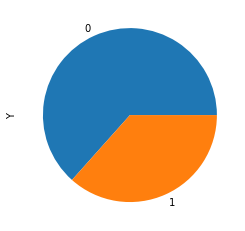

In [120]:
features_one_freq['Y'].value_counts().plot(kind='pie')

In [121]:
features_one_freq.value_counts("Y")

Y
0    354917
1    204913
dtype: int64

<AxesSubplot:ylabel='Y'>

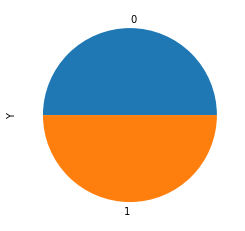

In [122]:
from sklearn.utils import resample
from sklearn.utils import shuffle

zero  = features_one_freq[features_one_freq['Y']==0]   # clase 0
one = features_one_freq[features_one_freq['Y']==1]  # clase 1

df_minority_upsampled = resample(one, replace = True, n_samples = 354917)
features_one_freq = pd.concat([zero, df_minority_upsampled])
features_one_freq = shuffle(features_one_freq) # shuffling so that there is particular sequence
features_one_freq['Y'].value_counts().plot(kind='pie')

In [123]:
Y = features_one_freq["Y"].to_numpy()
features_one_freq = features_one_freq.drop(columns=["Y"])
Y

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [124]:
X = features_one_freq

In [125]:
for i in X.columns:
    X[i].fillna(X[i].mode()[0], inplace=True)


In [126]:
X.head()

,BIN Bank,Country BIN ISO,Valor,Transaction type_AUTHORIZATION_AND_CAPTURE,Transaction type_REFUND,Transaction type_VOID,Transaction origin_POST_API,Transaction origin_STANDARD_HTML_v4_0,Payment method_CRED_AMEX,Payment method_CRED_DINERS,...,Payment method_REDEBAN_AMEX,Payment method_REDEBAN_DINERS,Payment method_REDEBAN_MASTERCARD,Payment method_REDEBAN_VISA,Franchise_AMEX,Franchise_CODENSA,Franchise_DINERS,Franchise_MASTERCARD,Franchise_VISA,Franchise_VISA_DEBIT
373762,69232,373275,100,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
164030,6261,6324,69375,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
453367,20011,373275,500,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
112190,19148,373275,31350,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
309495,69232,373275,100,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


No NaN values in data to be trained and tested.

In [127]:
X.isnull().values.any()

False

Libraries needed to train and test models

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [129]:
X_train, X_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

In [130]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Not Fradulent', 'Fradulent']); ax.yaxis.set_ticklabels(['Not Fradulent', 'Fradulent'])

In [131]:
lr = LogisticRegression(random_state=42)

dt = DecisionTreeClassifier()

rf = RandomForestClassifier()

ada = AdaBoostClassifier()


In [132]:
classifiers = [('Regresión Logística', lr),
               ('Árbol de Decisión', dt), ('Random Forest', rf), ('AdaBoost', ada),]

In [133]:
classifier_names = []
classifier_acc = []
ypredict = []
for classifier_name, classifier in classifiers:
 
    # Ajuste para datos de entrenamiento
    classifier.fit(X_train, Y_train)    

    # Predicciones
    y_pred = classifier.predict(X_test)
    ypredict.append(y_pred)
    accuracy = accuracy_score(y_test,y_pred)

    # Evaluación del clasificador
    print('{:s} : {:.2f}'.format(classifier_name, accuracy))
    classifier_names.append(classifier_name)
    classifier_acc.append(accuracy)

Regresión Logística : 0.67
Árbol de Decisión : 0.90
Random Forest : 0.90
AdaBoost : 0.83


A decision tree is may fit best this model, now is importnat to test it in teh original data set. A confusion matrix could help to understan the data.

<h3><center>Confusion Matrix for Decision Tree Classifier </center></h3>

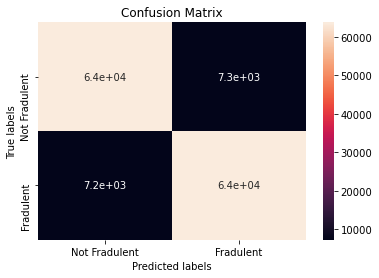

In [134]:
plot_confusion_matrix(y_test,ypredict[1])

<h3><center>Confusion Matrix for Logistic Regression</center></h3>

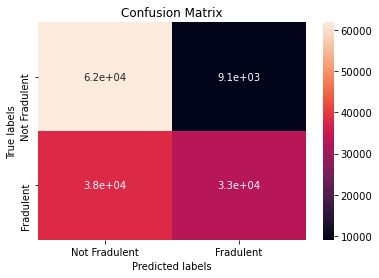

In [135]:
plot_confusion_matrix(y_test,ypredict[0])

<h3><center>Confusion Matrix for Random Forest Classifier</center></h3>

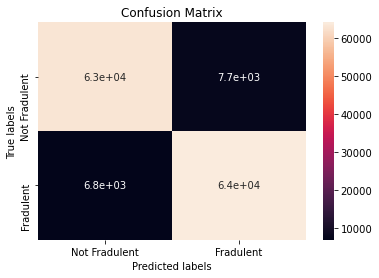

In [136]:
plot_confusion_matrix(y_test,ypredict[2])

<h3><center>Confusion Matrix for Ada Boost Classifier</center></h3>

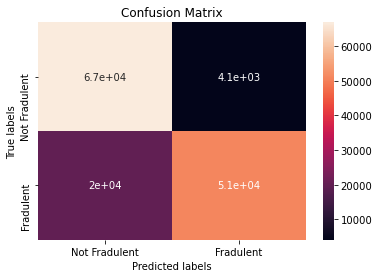

In [137]:
plot_confusion_matrix(y_test,ypredict[3])

<h1><center>Testing original data </center></h1>

In [148]:
X_or = pd.read_csv(r'C:\Users\hebji\Documents\Examen Empleo\X.csv')
X_or = X_or.drop(columns=["Unnamed: 0"])
Y_or = pd.read_csv(r'C:\Users\hebji\Documents\Examen Empleo\Y.csv')
Y_or = Y_or.drop(columns=["Unnamed: 0"])

In [149]:
X_train, X_test, Y_train, y_test = train_test_split(X_or, Y_or, test_size=0.2, random_state = 42)

<h3><center>Decision Tree Classifier </center></h3>

Accuarcy for test with Decision Tree model is: 0.9297
Decision Tree model recall is: 0.9231
Decision Tree model precision is:  0.9297
Decision Tree model balanced F-score is: 0.9297


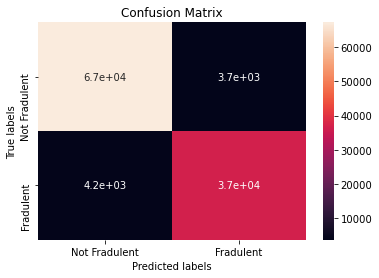

In [176]:
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuarcy for test with Decision Tree model is: {:.4f}".format(accuracy)) 
print("Decision Tree model recall is: {:.4f}".format(recall_score(y_test, y_pred, average='macro'))) 
print("Decision Tree model precision is:  {:.4f}".format(recall_score(y_test, y_pred, average='weighted')))
print("Decision Tree model balanced F-score is: {:.4f}".format(f1_score(y_test, y_pred, average='micro')))
plot_confusion_matrix(y_test,y_pred)

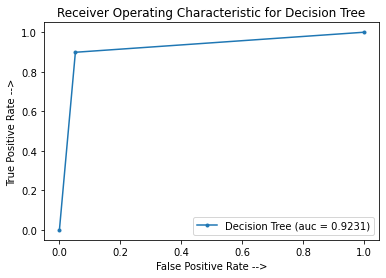

In [180]:
tree_fpr, tree_tpr, threshold = roc_curve(y_test, y_pred)
auc_tree = auc(tree_fpr, tree_tpr)


plt.plot(tree_fpr, tree_tpr, marker='.', label='Decision Tree (auc = %0.4f)' % auc_tree)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.title('Receiver Operating Characteristic for Decision Tree')

plt.legend()

plt.show()

<h3><center>Random Forest Classifier</center></h3>

Accuarcy for test with Random Forest model is: 0.9283
Random Forest model recall is: 0.9232
Random Forest model precision is:  0.9283
Random Forest model balanced F-score is: 0.9283


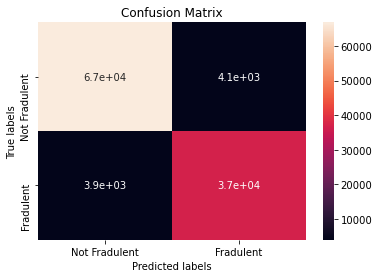

In [181]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuarcy for test with Random Forest model is: {:.4f}".format(accuracy)) 
print("Random Forest model recall is: {:.4f}".format(recall_score(y_test, y_pred, average='macro'))) 
print("Random Forest model precision is:  {:.4f}".format(recall_score(y_test, y_pred, average='weighted')))
print("Random Forest model balanced F-score is: {:.4f}".format(f1_score(y_test, y_pred, average='micro')))
plot_confusion_matrix(y_test,y_pred)

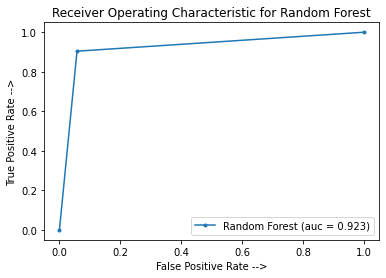

In [182]:
rf_fpr, rf_tpr, threshold = roc_curve(y_test, y_pred)
auc_rf = auc(rf_fpr, rf_tpr)


plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (auc = %0.3f)' % auc_rf)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.title('Receiver Operating Characteristic for Random Forest')

plt.legend()

plt.show()

## A seen above, a decision tree and random forest model are the ideals in this problem. They can predict a fraud transaction with precision of ~ 93%, this will be the end of the project.